<a href="https://colab.research.google.com/github/uykm/ai-introdcution-assignment/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [3]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 166s 1us/step


# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [9]:
import tensorflow as tf

# Data loading and preprocessing from previous cells
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


num_classes = 10

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    data_augmentation,

    # Block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.35),

    # FC
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    verbose=1
)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

Epoch 1/30
782/782 - 23s - 30ms/step - accuracy: 0.4248 - loss: 1.6979 - val_accuracy: 0.4903 - val_loss: 1.4415 - learning_rate: 1.0000e-03
Epoch 2/30
782/782 - 14s - 17ms/step - accuracy: 0.5455 - loss: 1.2671 - val_accuracy: 0.5849 - val_loss: 1.2098 - learning_rate: 1.0000e-03
Epoch 3/30
782/782 - 13s - 17ms/step - accuracy: 0.5908 - loss: 1.1500 - val_accuracy: 0.5903 - val_loss: 1.2365 - learning_rate: 1.0000e-03
Epoch 4/30
782/782 - 13s - 17ms/step - accuracy: 0.6175 - loss: 1.0760 - val_accuracy: 0.6227 - val_loss: 1.1061 - learning_rate: 1.0000e-03
Epoch 5/30
782/782 - 13s - 17ms/step - accuracy: 0.6423 - loss: 1.0112 - val_accuracy: 0.6487 - val_loss: 1.0339 - learning_rate: 1.0000e-03
Epoch 6/30
782/782 - 21s - 26ms/step - accuracy: 0.6606 - loss: 0.9649 - val_accuracy: 0.6731 - val_loss: 0.9368 - learning_rate: 1.0000e-03
Epoch 7/30
782/782 - 14s - 17ms/step - accuracy: 0.6732 - loss: 0.9368 - val_accuracy: 0.6962 - val_loss: 0.8735 - learning_rate: 1.0000e-03
Epoch 8/30
78

## Evaluate neural network performance


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.7974 - loss: 0.5857


[0.5857169032096863, 0.7973999977111816]

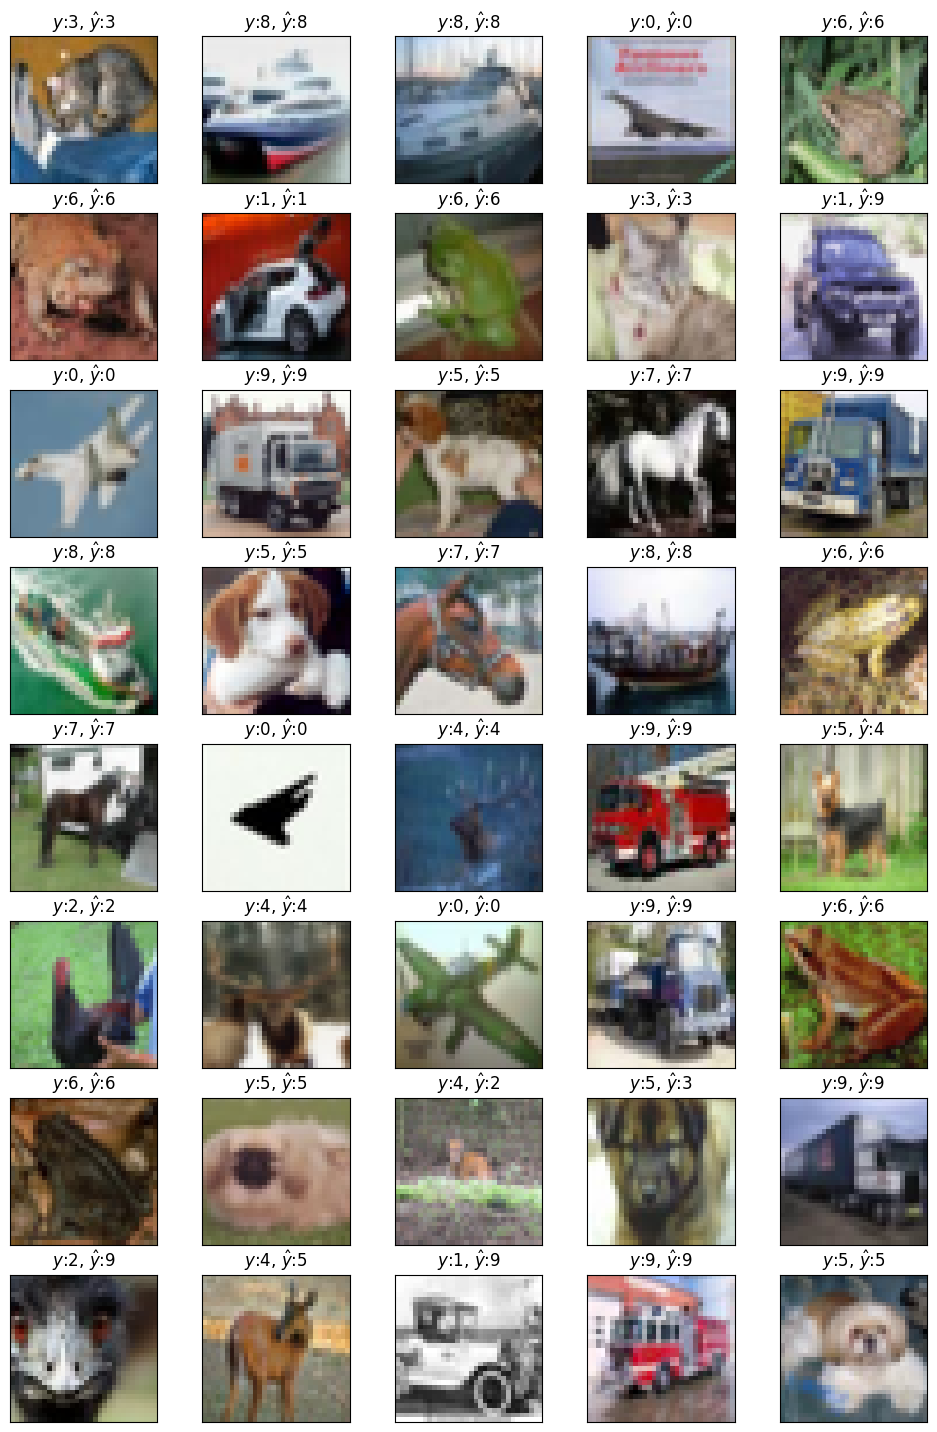

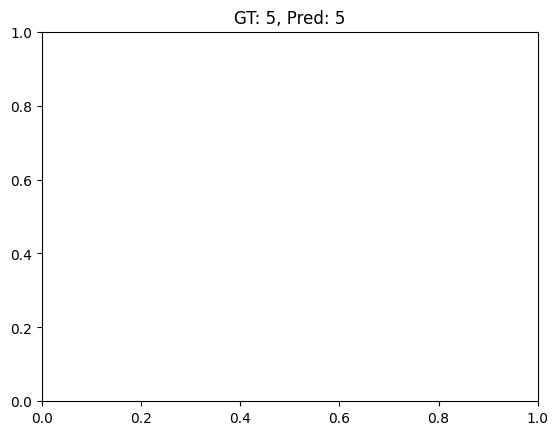

In [11]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7973999977111816
